# Permutations

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Permutation`
Apply a permutation of [0, N - 1] on the basis states.

Given a permutation $P : [0, N - 1] \to [0, N - 1]$, this bloq applies the unitary:

$$
    U|x\rangle = |P(x)\rangle
$$

Decomposes a permutation into cycles and applies them in order.
See :meth:`from_dense_permutation` to construct this bloq from a permutation,
and :meth:`from_partial_permutation_map` to construct it from a mapping.

#### Parameters
 - `N`: the total size the permutation acts on.
 - `cycles`: a sequence of permutation cycles that form the permutation.
 - `bitsize`: number of bits to store the indices, defaults to $\ceil(\log_2(N))$. 

#### Registers
 - `x`: integer register storing a value in [0, ..., N - 1] 

#### References
 - [A simple quantum algorithm to efficiently prepare sparse states](https://arxiv.org/abs/2310.19309v1). Appendix B.


In [2]:
from qualtran.bloqs.arithmetic.permutation import Permutation

### Example Instances

In [3]:
permutation = Permutation.from_dense_permutation([1, 3, 0, 2])

In [4]:
import sympy

from qualtran.symbolics import Shaped

N, k = sympy.symbols("N k", positive=True, integer=True)
permutation_symb = Permutation(N, Shaped((k,)))

In [5]:
import sympy

from qualtran.symbolics import Shaped

N = sympy.symbols("N", positive=True, integer=True)
n_cycles = 4
d = sympy.IndexedBase('d', shape=(n_cycles,))
permutation_symb_with_cycles = Permutation(N, tuple(Shaped((d[i],)) for i in range(n_cycles)))

In [6]:
sparse_permutation = Permutation.from_partial_permutation_map(
    16, {0: 1, 1: 3, 2: 8, 3: 15, 4: 12}
)

In [7]:
import sympy

N = sympy.symbols("N", positive=True, integer=True)
sparse_permutation_with_symbolic_N = Permutation.from_partial_permutation_map(
    N, {0: 1, 1: 3, 2: 4, 3: 7}
)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([permutation, permutation_symb, permutation_symb_with_cycles, sparse_permutation, sparse_permutation_with_symbolic_N],
           ['`permutation`', '`permutation_symb`', '`permutation_symb_with_cycles`', '`sparse_permutation`', '`sparse_permutation_with_symbolic_N`'])

### Call Graph

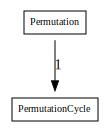

#### Counts totals:
 - `PermutationCycle`: 1

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
permutation_g, permutation_sigma = permutation.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(permutation_g)
show_counts_sigma(permutation_sigma)

## `PermutationCycle`
Apply a single permutation cycle on the basis states.

Given a permutation cycle $C = (v_0 v_2 \ldots v_{k - 1})$, applies the following unitary:

    $$
        U|v_i\rangle \mapsto |v_{(i + 1)\mod k}\rangle
    $$

for each $i \in [0, k)$, and

    $$
        U|x\rangle \mapsto |x\rangle
    $$

and for every $x \not\in C$.

#### Parameters
 - `N`: the total size the permutation acts on.
 - `cycle`: the permutation cycle to apply.
 - `bitsize`: number of bits to store the indices, defaults to $\ceil(\log_2(N))$. 

#### Registers
 - `x`: integer register storing a value in [0, ..., N - 1] 

#### References
 - [A simple quantum algorithm to efficiently prepare sparse states](https://arxiv.org/abs/2310.19309v1). Appendix B, Algorithm 7.


In [10]:
from qualtran.bloqs.arithmetic.permutation import PermutationCycle

### Example Instances

In [11]:
import sympy

N = sympy.symbols("n", positive=True, integer=True)
cycle = (3, 1, 2)
permutation_cycle_symb_N = PermutationCycle(N, cycle)

In [12]:
import sympy

from qualtran.symbolics import Shaped

N, L = sympy.symbols("N L", positive=True, integer=True)
cycle = Shaped((L,))
permutation_cycle_symb = PermutationCycle(N, cycle)

In [13]:
permutation_cycle = PermutationCycle(4, (0, 1, 2))

#### Graphical Signature

In [14]:
from qualtran.drawing import show_bloqs
show_bloqs([permutation_cycle_symb_N, permutation_cycle_symb, permutation_cycle],
           ['`permutation_cycle_symb_N`', '`permutation_cycle_symb`', '`permutation_cycle`'])

### Call Graph

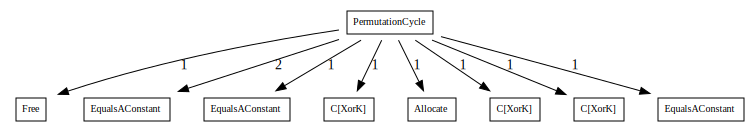

#### Counts totals:
 - `Allocate`: 1
 - `C[XorK]`: 1
 - `C[XorK]`: 1
 - `C[XorK]`: 1
 - `EqualsAConstant`: 1
 - `EqualsAConstant`: 1
 - `EqualsAConstant`: 2
 - `Free`: 1

In [15]:
from qualtran.resource_counting.generalizers import ignore_split_join
permutation_cycle_symb_N_g, permutation_cycle_symb_N_sigma = permutation_cycle_symb_N.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(permutation_cycle_symb_N_g)
show_counts_sigma(permutation_cycle_symb_N_sigma)